# Apredizaje automático: Clasificadores

## Árboles de decisión

In [1]:
#Cargar bibliotecas para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar el separador de muestras de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Importar el clasidicador: árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Importar las métriacs para la medición de la eficiencia del modelo
from sklearn import metrics

In [3]:
# Cargar el dataset
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Separacion del conjunto de datos en Entrenamiento-Pruebas
train, test = train_test_split(data, test_size=0.4, stratify=data['species'], random_state=42)

In [5]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa


In [6]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
61,5.9,3.0,4.2,1.5,versicolor
18,5.7,3.8,1.7,0.3,setosa
49,5.0,3.3,1.4,0.2,setosa
106,4.9,2.5,4.5,1.7,virginica


In [7]:
# Separacion de la etuqueta de clase <Y> y los atributos de <<X>>
# Conjunto de entrenamiento
X_train = train[['petal_length','petal_width']] # 'sepal_length','sepal_width',
Y_train = train['species']
# Conjunto de pruebas
X_test = test[['petal_length','petal_width']] # 'sepal_length','sepal_width',
Y_test = test['species']

### Creación del árbol de decisión

In [8]:
# Árbol de distinción
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=15)
# Ajustar / Entrenar el modelo
mod_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=15)

In [9]:
# Etiqueta de datos
caracteristicas = ['sepal_length','sepal_width','petal_length','petal_width']
clase = ['setosa', 'versicolor', 'virginica']

[Text(0.375, 0.875, 'sepal_length <= 2.7\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'sepal_width <= 1.55\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'sepal_length <= 4.95\ngini = 0.067\nsamples = 29\nvalue = [0, 28, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'sepal_length <= 4.85\ngini = 0.121\nsamples = 31\nvalue = [0, 2, 29]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica')]

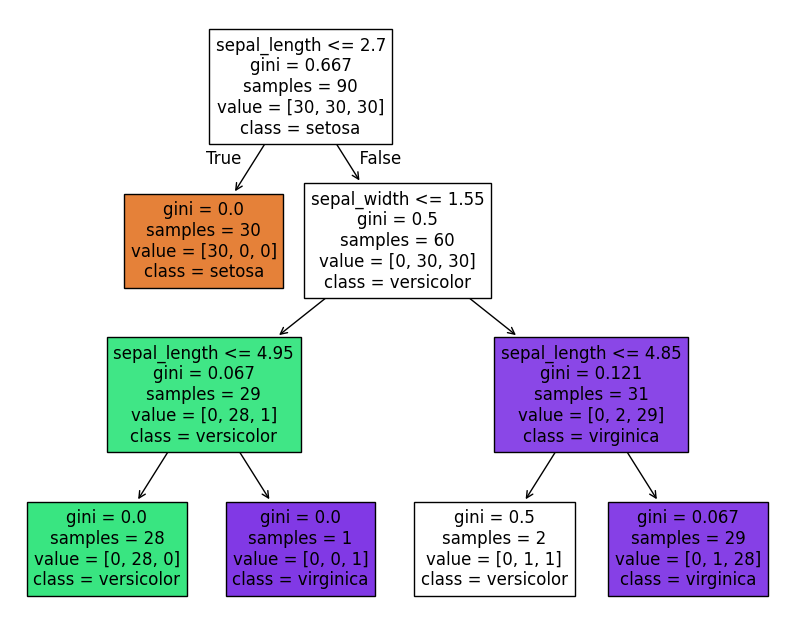

In [10]:
# Visualizar las reglas de clasificación
plt.figure(figsize=(10,8))
plot_tree(mod_dt, feature_names=caracteristicas, class_names=clase, filled=True)

### Verificación del modelo

In [11]:
# Predecir los resultados sobre el conjunto de pruebas
prediccion = mod_dt.predict(X_test)

In [12]:
prediccion

array(['setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [13]:
test['Predicción'] = prediccion
test

,sepal_length,sepal_width,petal_length,petal_width,species,Predicción
40,5.0,3.5,1.3,0.3,setosa,setosa
61,5.9,3.0,4.2,1.5,versicolor,versicolor
18,5.7,3.8,1.7,0.3,setosa,setosa
49,5.0,3.3,1.4,0.2,setosa,setosa
106,4.9,2.5,4.5,1.7,virginica,versicolor
20,5.4,3.4,1.7,0.2,setosa,setosa
69,5.6,2.5,3.9,1.1,versicolor,versicolor
93,5.0,2.3,3.3,1.0,versicolor,versicolor
141,6.9,3.1,5.1,2.3,virginica,virginica
104,6.5,3.0,5.8,2.2,virginica,virginica


In [14]:
eficiencia = metrics.accuracy_score(Y_test, prediccion)
eficiencia

0.95

In [15]:
# Importancia del predictor
# ['sepal_length','sepal_width','petal_length','petal_width']
mod_dt.feature_importances_

array([0.57372576, 0.42627424])